In [ ]:
# Import the following libraries
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import Counter
import csv

# NLTK libraries
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()


# Visualization libraries
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image # for world cloud image

# Spacy for preprocessing
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

#Spell checker
!pip install pyspellchecker
from spellchecker import SpellChecker

# Modelling
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

# xgboost
import xgboost as xgb

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam


# To change date to datetime
from datetime import datetime
import time
import re 

from collections import Counter
import string
import scipy.sparse

# Textblob
from textblob import TextBlob

# Gensim libraries
!pip install pyLDAvis
from gensim import corpora, models, similarities, matutils
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim
from gensim.models import CoherenceModel


# To show all the columns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)

# to pickle dataframe
import pickle

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")


# Enable logging for gensim - optional but important
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

from IPython.display import clear_output
clear_output()

## **Load the Dataset**

In [ ]:
df = pd.read_csv("Sample30.csv")

In [ ]:
df.head(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive


# **Text Pre-processing**

In [ ]:
print("Shape :", df.shape)

Shape : (30000, 15)


In [ ]:
print("Columns :")
print(df.columns)

Columns :
Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')


### **Rename the Columns**

In [ ]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [ ]:
print("Datatypes :\n",df.dtypes)

Datatypes :
 id                      object
brand                   object
categories              object
manufacturer            object
name                    object
reviews_date            object
reviews_didPurchase     object
reviews_doRecommend     object
reviews_rating           int64
reviews_text            object
reviews_title           object
reviews_userCity        object
reviews_userProvince    object
reviews_username        object
user_sentiment          object
dtype: object


In [ ]:
print("Info :")
print(df.info())

Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memor

In [ ]:
print("Missing Value Count :")
print(df.isnull().sum())

Missing Value Count :
id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64


### **Percentage of missing values per column**

In [ ]:
print("Percentage of missing values :")
print(df.isna().mean().round(4) * 100)

Percentage of missing values :
id                       0.00
brand                    0.00
categories               0.00
manufacturer             0.47
name                     0.00
reviews_date             0.15
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_rating           0.00
reviews_text             0.00
reviews_title            0.63
reviews_userCity        93.57
reviews_userProvince    99.43
reviews_username         0.21
user_sentiment           0.00
dtype: float64


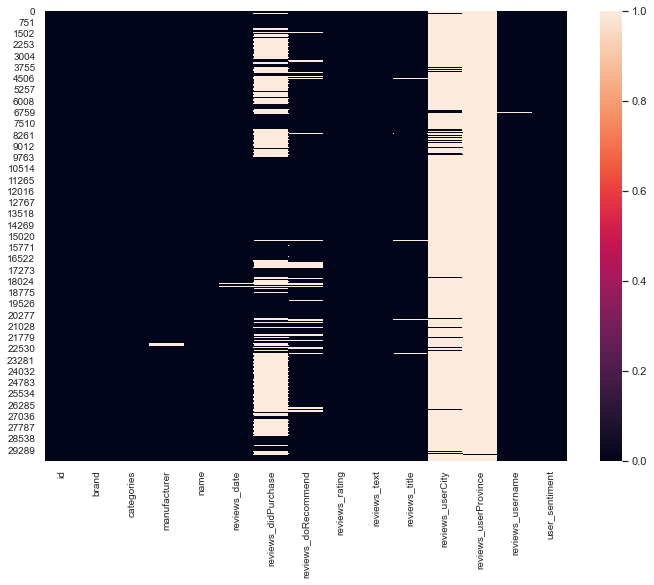

In [ ]:
#Visualization of Missing Values

# Plot it
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=df.isnull())
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()



In [ ]:
print("Total Missing Value Count : ", df.isnull().sum().values.sum())

Total Missing Value Count :  74980


In [ ]:
# Drop the columns with less than 20% of values
missing_val_threshold = len(df) * .2
df.dropna(thresh = missing_val_threshold, axis = 1, inplace = True)

In [ ]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [ ]:
# Shape of Dataset
df.shape

(30000, 13)

In [ ]:
# Drop the rows where "reviews.text" or "reviews.date" feature has Null values
df.dropna(subset=['reviews_text','reviews_date'], inplace=True)

In [ ]:
# Shape of Dataset
df.shape

(29954, 13)

In [ ]:
print("Percentage of missing values :")
print(df.isna().mean().round(4) * 100)

Percentage of missing values :
id                      0.00
brand                   0.00
categories              0.00
manufacturer            0.47
name                    0.00
reviews_date            0.00
reviews_didPurchase    46.81
reviews_doRecommend     8.43
reviews_rating          0.00
reviews_text            0.00
reviews_title           0.63
reviews_username        0.19
user_sentiment          0.00
dtype: float64


### **Combine Review Text and Title into one**

In [ ]:
# Joining Review Text and Title 
df['Review'] = df['reviews_title'].map(str) + " " + df['reviews_text'] 

### **Lowercasing**

In [ ]:
# Lowercasing the reviews and title column
df['Review'] = df['Review'].apply(lambda x : x.lower())

In [ ]:
df['Review'][0]

"just awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy."

### **Remove Punctuation**

In [ ]:
# Remove punctuation 
df['Review'] = df['Review'].str.replace('[^\w\s]','')

In [ ]:
df['Review'][0]

'just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy'

### **Remove Stopwords**

In [ ]:
# Remove Stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
df['Review'][0]

'awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy'

In [ ]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment',
       'Review'],
      dtype='object')

In [ ]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [ ]:
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [ ]:
df['Review']=df['Review'].apply(lambda x: lemmatize_sentence(x))

In [ ]:
df['Review'][0]

'awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy'

In [ ]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment',
       'Review'],
      dtype='object')

In [ ]:
df.to_csv("Updated_Sample30.csv")

In [ ]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment',
       'Review'],
      dtype='object')

In [ ]:
def scrub_words(text):
    """Basic cleaning of texts."""
    
    # remove html markup
    text=re.sub("(<.*?>)","",text)
    
    #remove non-ascii and digits
    text=re.sub("(\\W|\\d)"," ",text)
    
    #remove whitespace
    text=text.strip()
    return text

In [ ]:
df['Review']=df['Review'].apply(lambda x: scrub_words(x))

In [ ]:
df['Review'][0]

'awesome love album good hip hop side current pop sound hype listen everyday gym give  star rating way metaphor crazy'

In [ ]:
df['Review_WC'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review_WC','Review']].head(3)

,Review_WC,Review
0,21,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy
1,7,good good flavor review collect part promotion
2,3,good good flavor


<AxesSubplot:xlabel='Review_WC', ylabel='Density'>

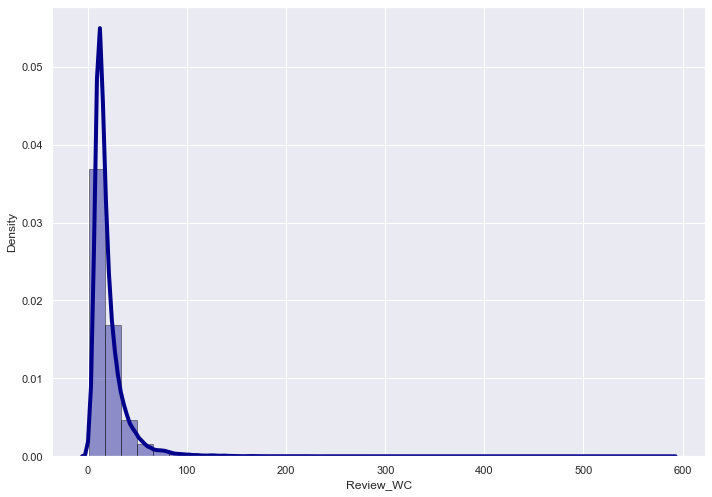

In [ ]:
# Density Plot and Histogram of all Word Count
sns.distplot(df['Review_WC'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:
df['Review_CC'] = df['Review'].str.len() ## this also includes spaces
df[['Review_CC','Review']].head(3)

,Review_CC,Review
0,116,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy
1,46,good good flavor review collect part promotion
2,16,good good flavor


<AxesSubplot:xlabel='Review_CC', ylabel='Density'>

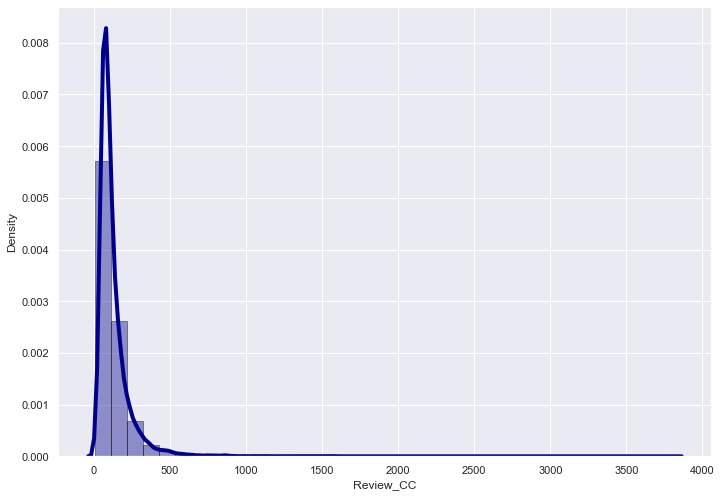

In [ ]:
# Density Plot and Histogram of all Character Count
sns.distplot(df['Review_CC'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['Review_AWL'] = df["Review"].apply(lambda x: avg_word(x))
df[['Review_AWL','Review']].head(3)

,Review_AWL,Review
0,4.800000,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy
1,5.714286,good good flavor review collect part promotion
2,4.666667,good good flavor


<AxesSubplot:xlabel='Review_AWL', ylabel='Density'>

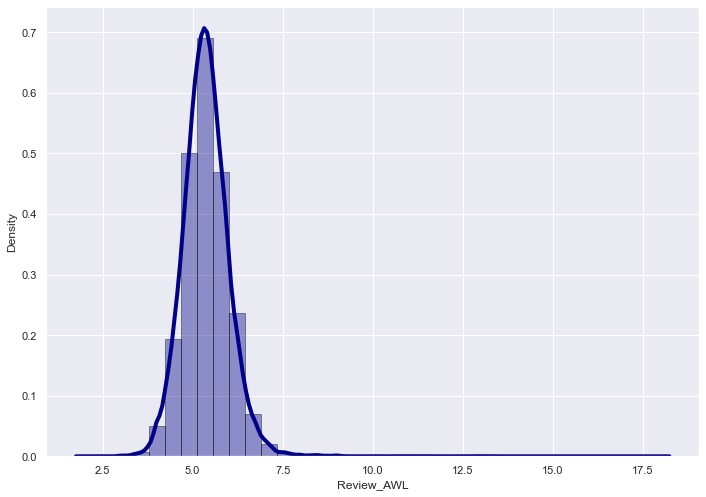

In [ ]:
# Density Plot and Histogram of Average Word Length
sns.distplot(df['Review_AWL'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,10))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

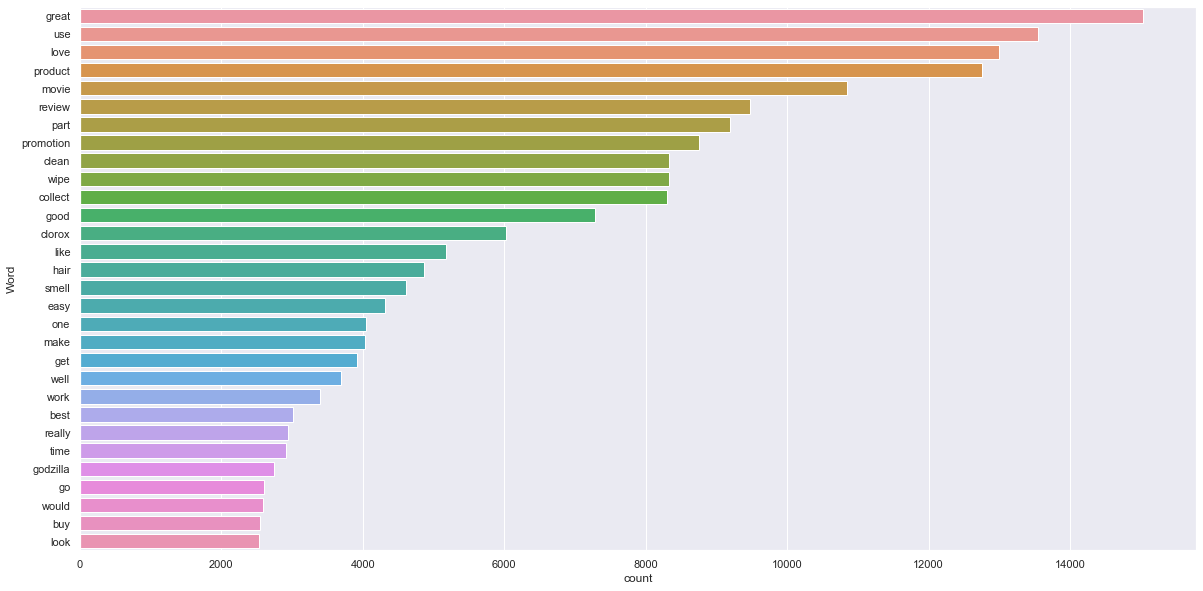

In [ ]:
freq_words(df['Review'])

In [ ]:
# function to plot least frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nsmallest(columns="count", n = terms) 
  plt.figure(figsize=(20,10))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

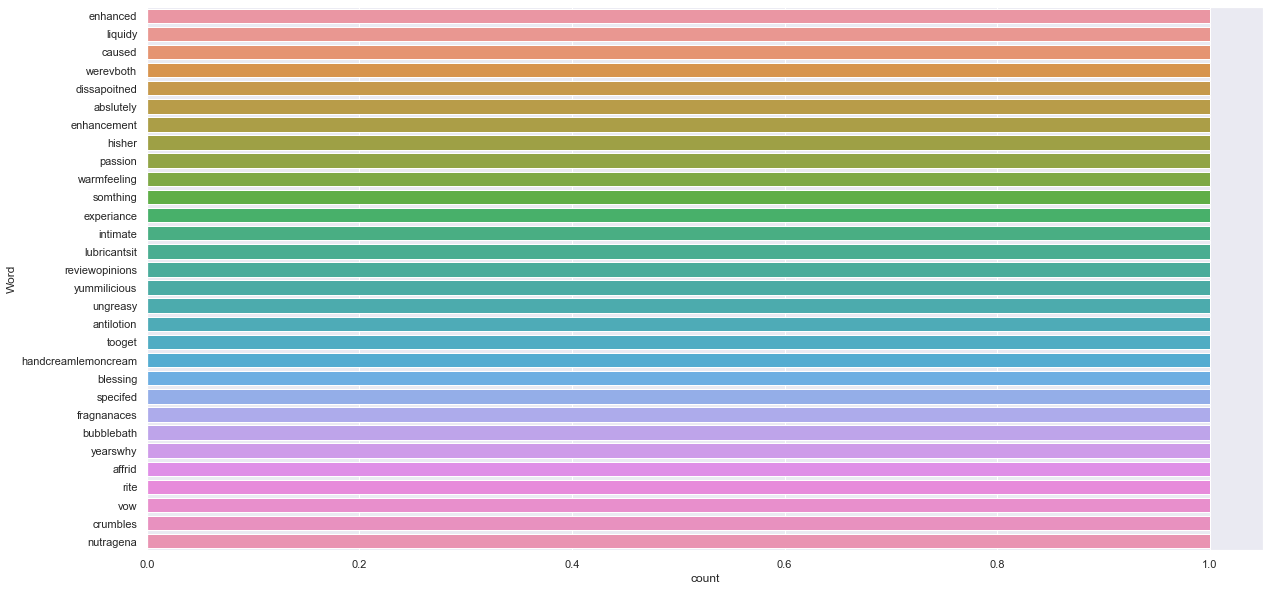

In [ ]:
freq_words(df['Review'])

In [ ]:
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = TextBlob(data).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]
 

In [ ]:

data = df['Review'][0]
print("Input Text :",data)

print("1-gram: ", extract_ngrams(data, 1))
print("2-gram: ", extract_ngrams(data, 2))
print("3-gram: ", extract_ngrams(data, 3))
print("4-gram: ", extract_ngrams(data, 4))

Input Text : awesome love album good hip hop side current pop sound hype listen everyday gym give  star rating way metaphor crazy
1-gram:  ['awesome', 'love', 'album', 'good', 'hip', 'hop', 'side', 'current', 'pop', 'sound', 'hype', 'listen', 'everyday', 'gym', 'give', 'star', 'rating', 'way', 'metaphor', 'crazy']
2-gram:  ['awesome love', 'love album', 'album good', 'good hip', 'hip hop', 'hop side', 'side current', 'current pop', 'pop sound', 'sound hype', 'hype listen', 'listen everyday', 'everyday gym', 'gym give', 'give star', 'star rating', 'rating way', 'way metaphor', 'metaphor crazy']
3-gram:  ['awesome love album', 'love album good', 'album good hip', 'good hip hop', 'hip hop side', 'hop side current', 'side current pop', 'current pop sound', 'pop sound hype', 'sound hype listen', 'hype listen everyday', 'listen everyday gym', 'everyday gym give', 'gym give star', 'give star rating', 'star rating way', 'rating way metaphor', 'way metaphor crazy']
4-gram:  ['awesome love album

In [ ]:
df_tf = (df['Review'][0:1]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
df_tf.columns = ['words','tf']
df_tf

,words,tf
0,hip,1
1,love,1
2,everyday,1
3,hype,1
4,,1
5,side,1
6,way,1
7,metaphor,1
8,awesome,1
9,star,1


In [ ]:
for i,word in enumerate(df_tf['words']):
  df_tf.loc[i, 'idf'] = np.log(df_tf.shape[0]/(len(df[df['Review'].str.contains(word)])))


In [ ]:
df_tf

,words,tf,idf
0,hip,1,-2.988564
1,love,1,-6.190413
2,everyday,1,-3.218876
3,hype,1,0.048790
4,,1,-7.262896
5,side,1,-3.667218
6,way,1,-5.055639
7,metaphor,1,2.351375
8,awesome,1,-4.380239
9,star,1,-3.903415


In [ ]:
df_tf['tfidf'] = df_tf['tf'] * df_tf['idf']
df_tf

,words,tf,idf,tfidf
0,hip,1,-2.988564,-2.988564
1,love,1,-6.190413,-6.190413
2,everyday,1,-3.218876,-3.218876
3,hype,1,0.048790,0.048790
4,,1,-7.262896,-7.262896
5,side,1,-3.667218,-3.667218
6,way,1,-5.055639,-5.055639
7,metaphor,1,2.351375,2.351375
8,awesome,1,-4.380239,-4.380239
9,star,1,-3.903415,-3.903415


In [ ]:
# Convert the Rating Date column in datetime format
df['reviews_date'] = df['reviews_date'].str.replace(".000Z","")
df['reviews_date'] = df['reviews_date'].str.replace("Z","")

In [ ]:
date = []
for i,j in enumerate(df['reviews_date']): 
  try :
    date.append(datetime.strptime(j, "%Y-%m-%dT%H:%M:%S"))
  except:
    print(i)
    j = df['reviews_date'][0]
    date.append(datetime.strptime(j, "%Y-%m-%dT%H:%M:%S"))

  
df['reviews_date'] = date

28377
28378
28379
28380
28381
28382
28383
28384


In [ ]:
df.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,Review,Review_WC,Review_CC,Review_AWL
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30 06:21:45,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy,21,116,4.800000
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive,good good flavor review collect part promotion,7,46,5.714286


In [ ]:
for i in ['brand', 'categories','manufacturer','name','reviews_rating']:   #'reviews_id',
  print("No. of unique values in %s is : %s" %(i, df[i].nunique()))

No. of unique values in brand is : 212
No. of unique values in categories is : 268
No. of unique values in manufacturer is : 225
No. of unique values in name is : 269
No. of unique values in reviews_rating is : 5


In [ ]:
df['brand'] = df['brand'].replace("L'oreal Paris","L'Oreal Paris")
df['brand'] = df['brand'].replace("Sony","Sony Pictures")

<AxesSubplot:>

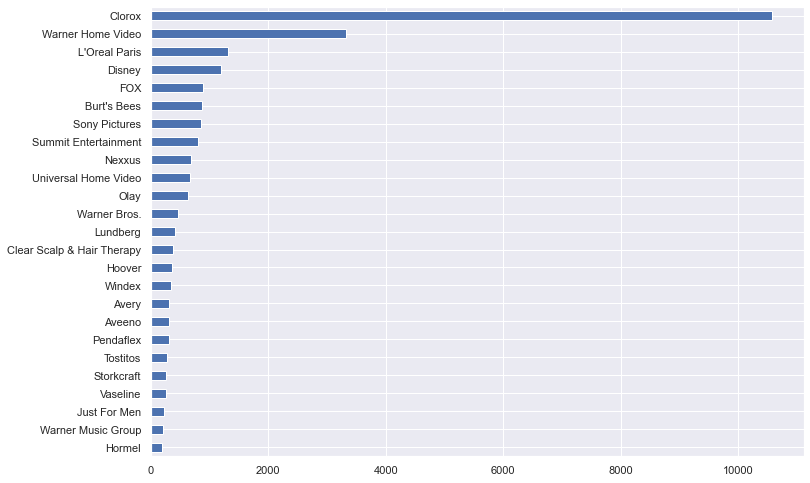

In [ ]:
df['brand'].value_counts()[0:25].sort_values().plot(kind = 'barh')

In [ ]:
df["product_cat"] = df["categories"].apply(lambda x: x.split(",")[0])

df['product_cat'] = df['product_cat'].replace("Movies","Movies & TV Shows")
df['product_cat'] = df['product_cat'].replace("Food","Food & Beverage")
df['product_cat'] = df['product_cat'].replace("Household Chemicals","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Music on CD or Vinyl","Musical Instruments & Karaoke")
df['product_cat'] = df['product_cat'].replace("Pro Audio","Musical Instruments & Karaoke")
df['product_cat'] = df['product_cat'].replace("Baby","Kids")
df['product_cat'] = df['product_cat'].replace("Kids' Rooms","Kids")
df['product_cat'] = df['product_cat'].replace("Brand Shop","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Featured Brands","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Home Improvement","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Furniture","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Video Games","Sports & Outdoors")
df['product_cat'] = df['product_cat'].replace("Home","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Mobile","Electronics")
df['product_cat'] = df['product_cat'].replace("Photography","Electronics")
df['product_cat'] = df['product_cat'].replace("Patio & Garden","Accessories")
df['product_cat'] = df['product_cat'].replace("Gift Finder","Accessories")
df['product_cat'] = df['product_cat'].replace("Auto & Tires","Accessories")
df['product_cat'] = df['product_cat'].replace("Kitchen & Dining","Food & Beverage")


<AxesSubplot:>

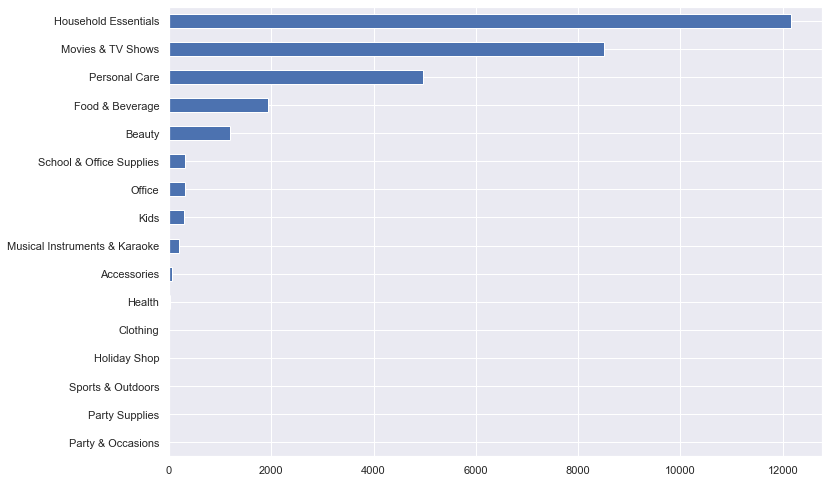

In [ ]:
df['product_cat'].value_counts()[0:25].sort_values().plot(kind = 'barh')

<AxesSubplot:>

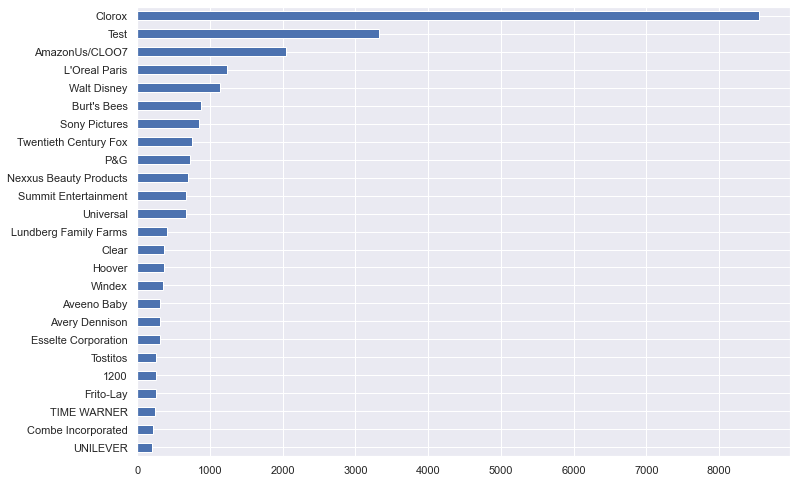

In [ ]:
df['manufacturer'] = df['manufacturer'].replace("L'oreal Paris","L'Oreal Paris")
df['manufacturer'] = df['manufacturer'].replace("SONY CORP","Sony Pictures")
df['manufacturer'].value_counts()[0:25].sort_values().plot(kind = 'barh')

<AxesSubplot:xlabel='reviews_rating', ylabel='count'>

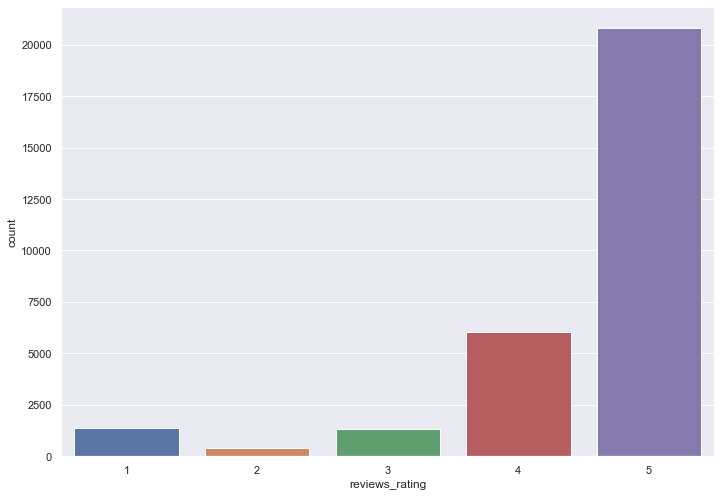

In [ ]:
# Density Plot and Histogram of Reviews Ratings
sns.countplot(df['reviews_rating'])

In [ ]:
df['year'], df['day'], df['month'] = df['reviews_date'].dt.year, df['reviews_date'].dt.day, df['reviews_date'].dt.month

In [ ]:
df['hour'], df['minute'], df['second'] = df['reviews_date'].dt.hour, df['reviews_date'].dt.minute, df['reviews_date'].dt.second

<AxesSubplot:xlabel='count', ylabel='year'>

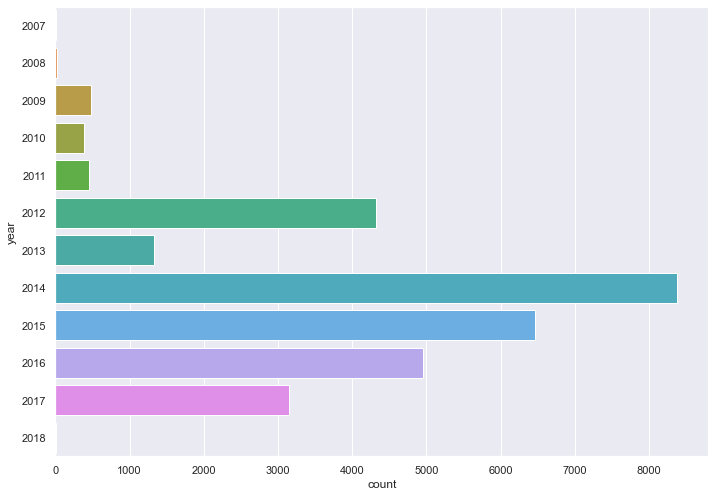

In [ ]:
sns.countplot(y=df['year'])

<AxesSubplot:xlabel='count', ylabel='year'>

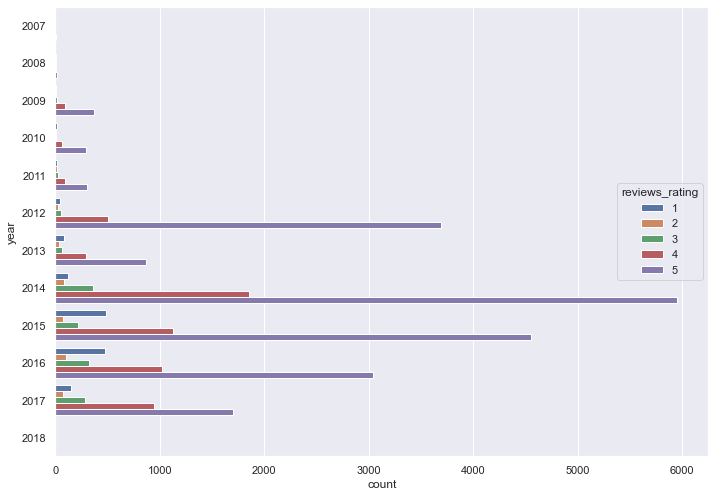

In [ ]:
sns.countplot(y=df['year'], hue=df['reviews_rating'])

<AxesSubplot:xlabel='count', ylabel='hour'>

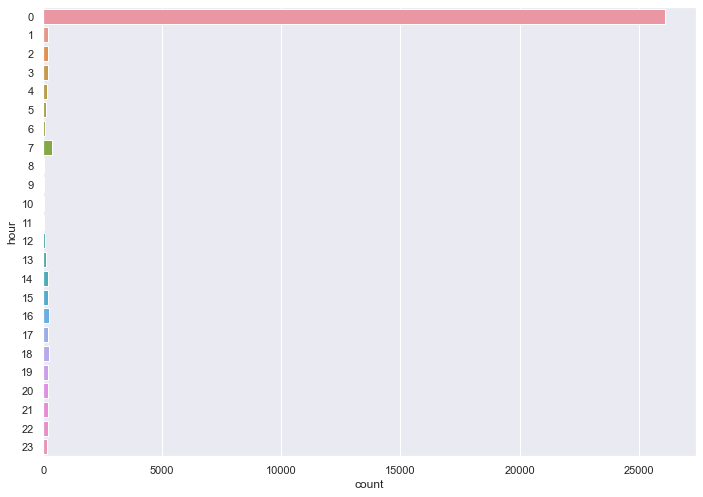

In [ ]:
sns.countplot(y=df['hour'])

<AxesSubplot:xlabel='count', ylabel='hour'>

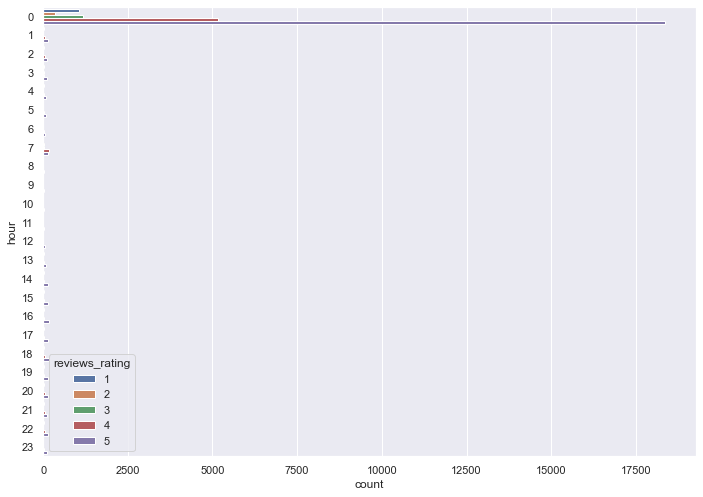

In [ ]:
sns.countplot(y=df['hour'], hue=df['reviews_rating'])

In [ ]:
df['product_cat'].nunique()

16

<AxesSubplot:xlabel='count', ylabel='product_cat'>

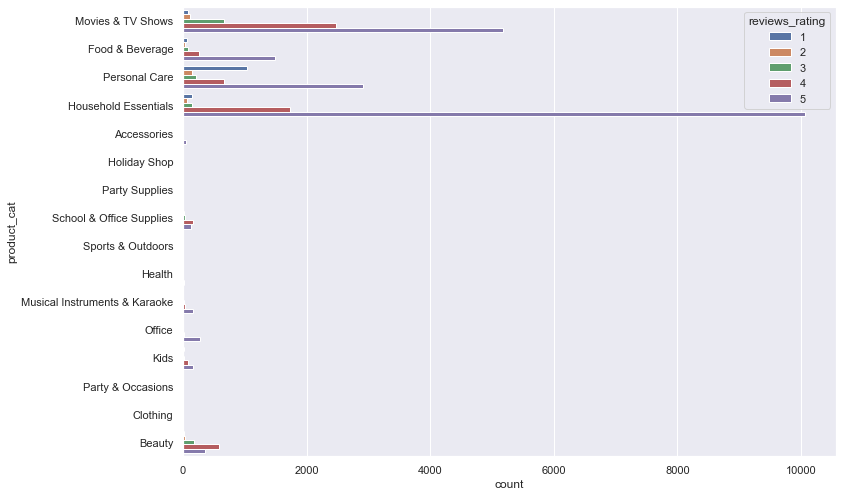

In [ ]:
sns.countplot(y=df['product_cat'], hue=df['reviews_rating'])

<AxesSubplot:xlabel='count', ylabel='reviews_rating'>

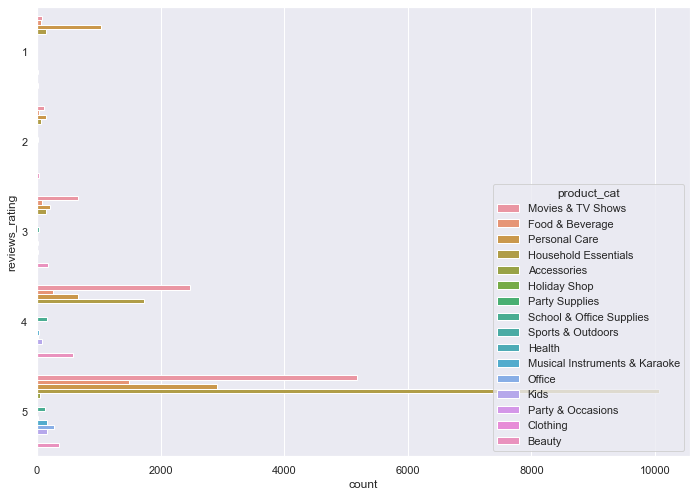

In [ ]:
sns.countplot(y=df['reviews_rating'], hue=df['product_cat'])

<AxesSubplot:xlabel='count', ylabel='brand'>

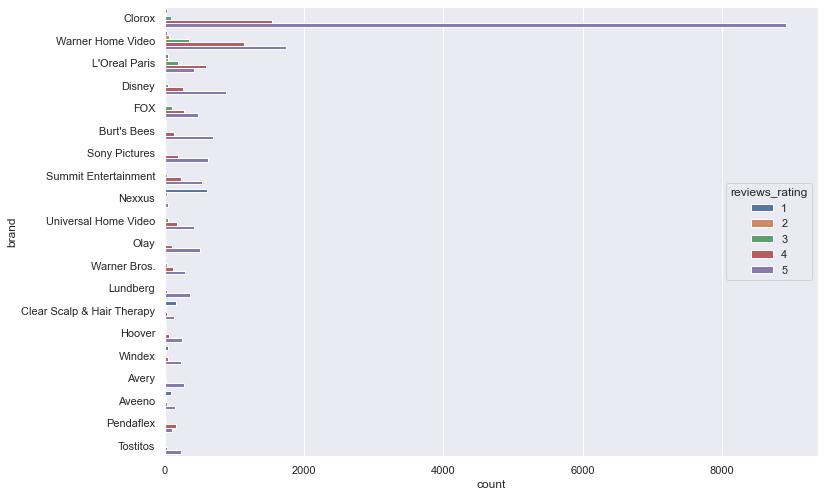

In [ ]:
sns.countplot(y=df['brand'], hue=df['reviews_rating'], order=df['brand'].value_counts().iloc[:20].index)

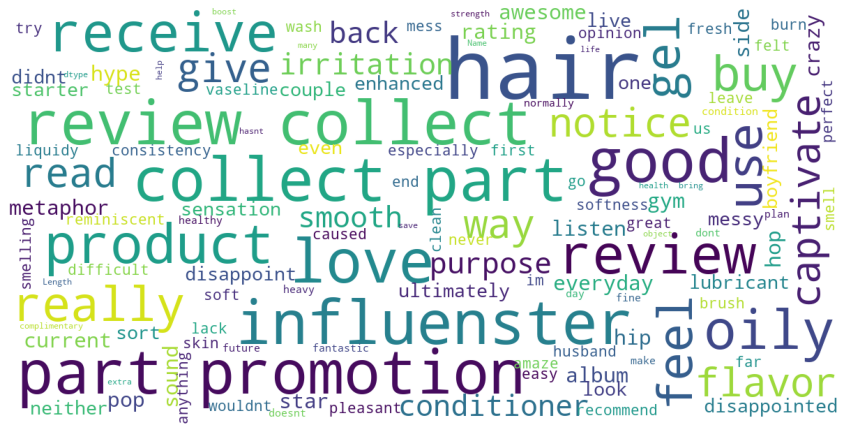

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Review'])

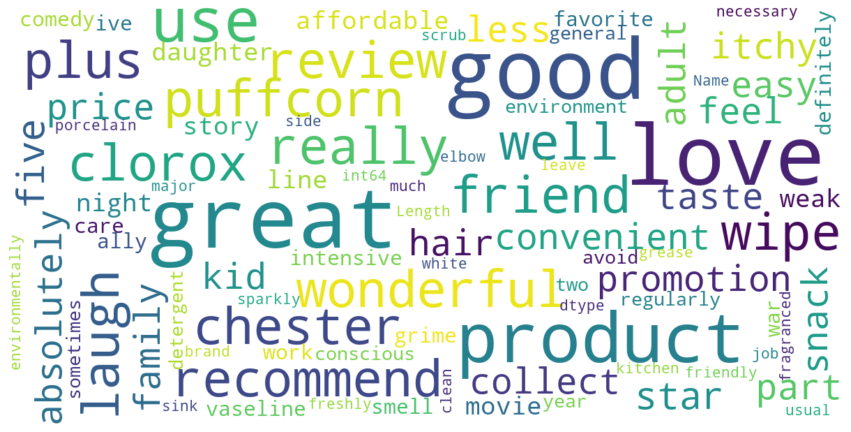

In [ ]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=3,
        random_state=1).generate(str(df['Review'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

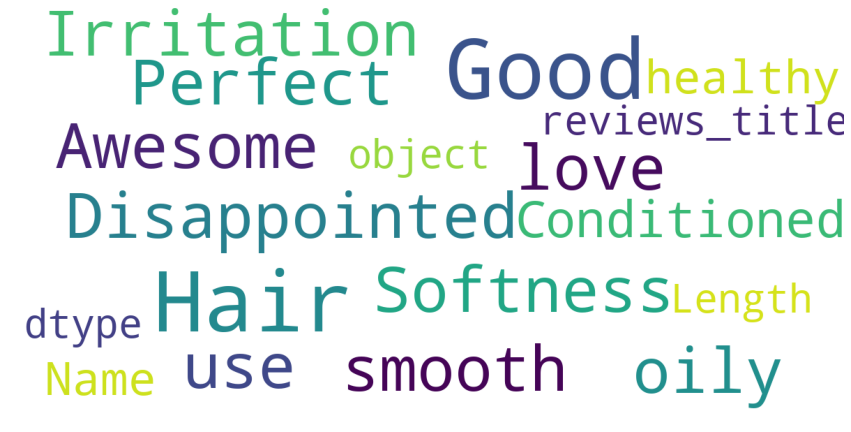

In [ ]:
show_wordcloud(df['reviews_title'])
# Great = 10938, great = 3133
# Disappointed = 156, disappointed = 75, Disappointing = 50, disappointing = 25, dissapoitned = 

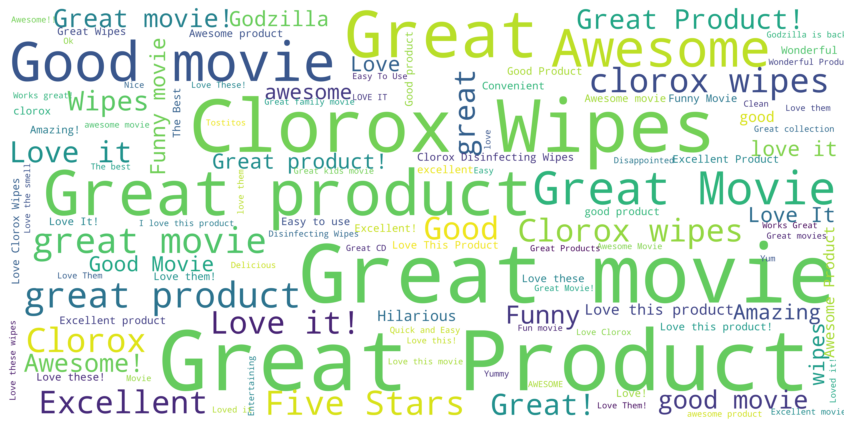

In [ ]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=400, max_font_size=40, scale=30,
        random_state=1).generate_from_frequencies((df['reviews_title'].value_counts()  ))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

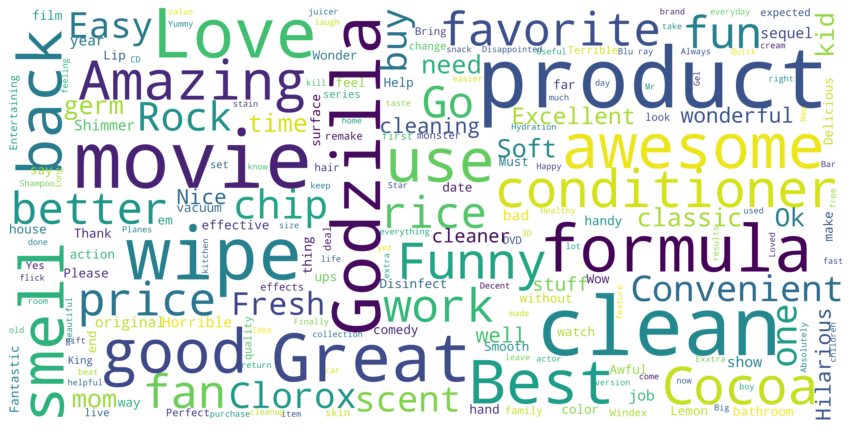

In [ ]:
# try to tokenize to individual word (uni-gram) - reviews.title
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews_title'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
len(big_list)  # reviews_title


95431

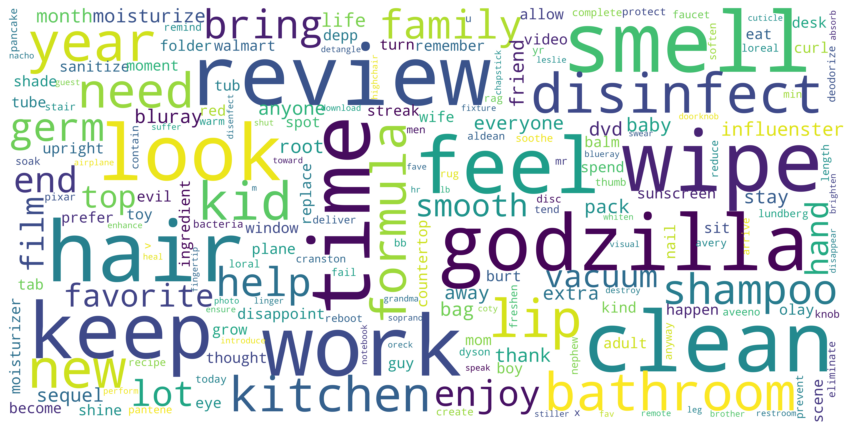

In [ ]:
# try to tokenize to individual word (uni-gram) - reviews.text
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['Review'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
len(big_list)   # reviews_text


603843

In [ ]:
# on the reviews.didPurchase column, replace 38,886 null fields with "Null"
df['reviews_didPurchase'].fillna('Null', inplace=True)


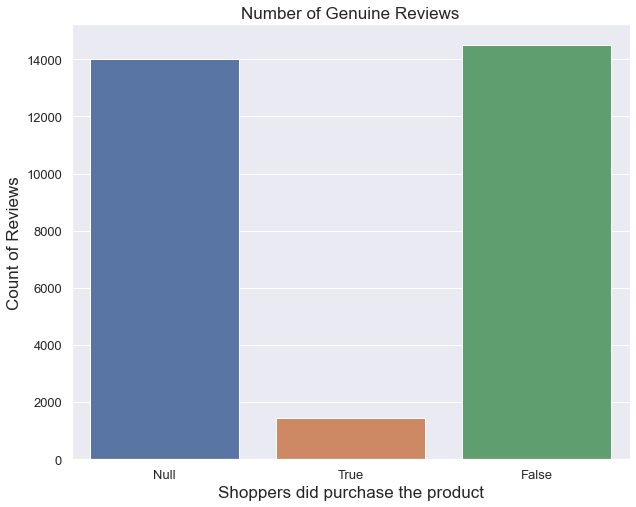

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df['reviews_didPurchase'])
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of Genuine Reviews', fontsize=17)
ax.tick_params(labelsize=13)

In [ ]:
df['reviews_didPurchase'].value_counts()


False    14498
Null     14022
True      1434
Name: reviews_didPurchase, dtype: int64

In [ ]:
# shoppers who did purchased the product and provided the review = 5%
print("Percentage of genuine reviews :",368200/(38785 + 28474))

Percentage of genuine reviews : 5.474360308657578


<AxesSubplot:>

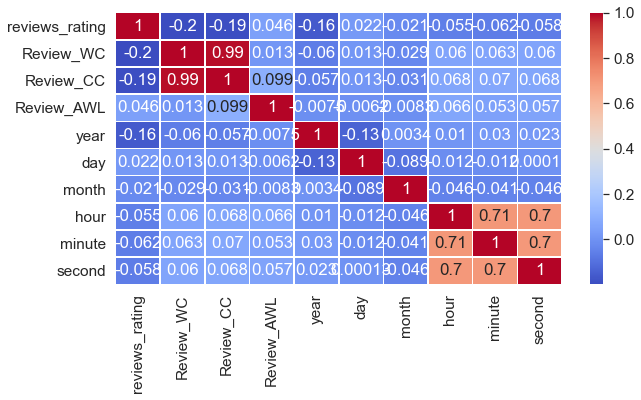

In [ ]:
# not much info in the correlation map
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

In [ ]:
# "The Foodsaver174 10 Cup Fresh Container - Fac10-000" is purchased almost 500 times
df_genuine = df[df['reviews_didPurchase'] == True]
df_genuine['name'].value_counts()

Hormel Chili, No Beans                                                      91
Coty Airspun Face Powder, Translucent Extra Coverage                        87
Chester's Cheese Flavored Puffcorn Snacks                                   77
Tostitos Bite Size Tortilla Chips                                           59
Lysol Concentrate Deodorizing Cleaner, Original Scent                       55
                                                                            ..
Suave Professionals Hair Conditioner, Sleek                                  1
Bi-O-kleen Spray & Wipe All Purpose Cleaner                                  1
Head & Shoulders Classic Clean Conditioner                                   1
Physicians Formula Powder Palette Mineral Glow Pearls, Translucent Pearl     1
Mill Creek Aloe Vera & Paba Lotion                                           1
Name: name, Length: 144, dtype: int64

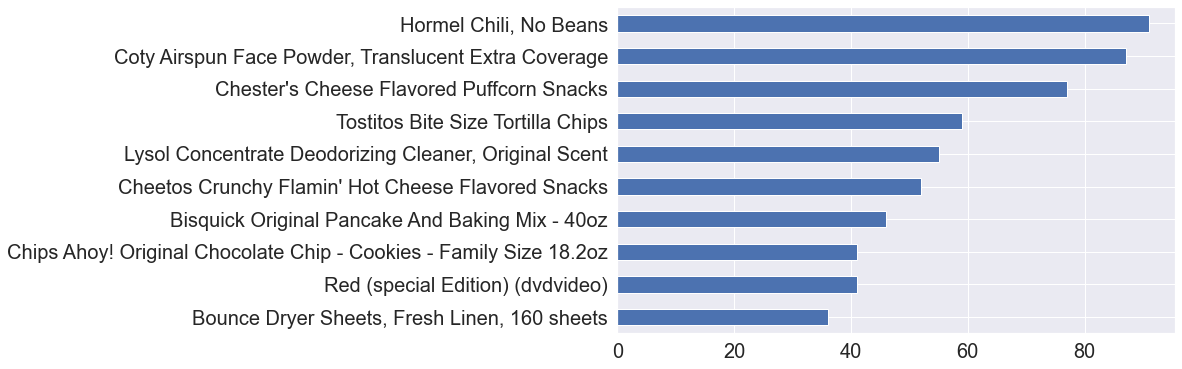

In [ ]:
df_genuine['name'].value_counts()[0:10].plot(kind ='barh', figsize=[10,6], fontsize=20).invert_yaxis()

In [ ]:
df_mbp = df_genuine[df_genuine['name'] == 'Hormel Chili, No Beans']
df_mbp = df_mbp[df_mbp['reviews_rating']==5]
# keep relevant columns only
df_mbp = df_mbp[[ 'reviews_rating', 'Review']]
df_mbp.head(3)

,reviews_rating,Review
6338,5,great taste texture perfect chili dog
6341,5,chili lol never ask review can good chili people cylinder shape package phenomenal love sound pop top consistent reliable product son love fritos rofl
6343,5,best purchase special chili dog item good quality work great


In [ ]:
# filter most purchased product with 1 star rating
df_lvp = df_genuine[df_genuine['name'] == 'Hormel Chili, No Beans']
df_lvp = df_lvp[df_lvp['reviews_rating']==1]
# keep relevant columns only
df_lvp = df_lvp[[ 'reviews_rating', 'Review']]
df_lvp.head(3)

,reviews_rating,Review
6267,1,bland bland want buy


In [ ]:
# Document-Term Matrix (Count Vectorizer)
word_vectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_lvp["Review"])
df_doc_term = pd.DataFrame(sparse_matrix.toarray(), columns=word_vectorizer.get_feature_names())
df_doc_term.shape

(1, 8)

In [ ]:
df_doc_term.head(2)

,bland,bland bland,bland bland want,bland want,bland want buy,buy,want,want buy
0,2,1,1,1,1,1,1,1


In [ ]:
time1 = time.time()
# Convert sparse matrix of counts to a gensim corpus 
corpus = matutils.Sparse2Corpus(sparse_matrix)
# Map matrix rows to words (tokens)
id2word = dict((v, k) for k, v in word_vectorizer.vocabulary_.items())
# len(id2word)
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=3, id2word=id2word, passes=5)
# 10 most important words for each of the 3 topics
lda.print_topics()
# Transform the docs from word space to topic space
lda_corpus = lda[corpus]
# Store the doc topic vectors in a list for review
lda_docs = [doc for doc in lda_corpus]
# Find the document vectors in the topic space for the first 10 documents
lda_docs[0:10] 
time2 = time.time()
time_taken = time2 - time1
print(time_taken)

0.051999568939208984


In [ ]:
lda.print_topics()

[(0,
  '0.150*"bland" + 0.121*"bland bland" + 0.121*"bland bland want" + 0.121*"bland want" + 0.121*"bland want buy" + 0.121*"buy" + 0.121*"want" + 0.121*"want buy"'),
 (1,
  '0.142*"bland" + 0.123*"bland bland" + 0.123*"bland bland want" + 0.123*"bland want" + 0.123*"bland want buy" + 0.123*"buy" + 0.123*"want" + 0.123*"want buy"'),
 (2,
  '0.798*"bland" + 0.029*"bland bland" + 0.029*"bland bland want" + 0.029*"bland want" + 0.029*"bland want buy" + 0.029*"buy" + 0.029*"want" + 0.029*"want buy"')]

In [ ]:
lsa.components_.round(10)

array([[0.60302269, 0.30151134, 0.30151134, 0.30151134, 0.30151134,
        0.30151134, 0.30151134, 0.30151134]])

In [ ]:
# Topic Modeling with Matrix Factorization and LSA (Latent Semantic Analysis) aka Singular Value Decomposition (SVD)
time1 = time.time()
lsa = TruncatedSVD(3)
# Transform the doc-term matrix to doc-topic matrix
df_doc_topic = lsa.fit_transform(df_doc_term)
lsa.explained_variance_ratio_
# Getting the U-matrix in Decomposition
topic_word = pd.DataFrame(lsa.components_.round(10),   # 10 for decimal places
             index = ["component_1"],   #,"component_2","component_3"
             columns = word_vectorizer.get_feature_names()) # notes is vectoriser only 
# topic_word
# Top 10 key words for each of the 6 topics
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lsa, word_vectorizer.get_feature_names(), 20)
time2 = time.time()
time_taken = time2 - time1
print('\nTime Taken: {:.2f} seconds'.format(time_taken))


Topic  0
bland, want buy, want, buy, bland want buy, bland want, bland bland want, bland bland

Time Taken: 0.01 seconds


In [ ]:
# # Topic Modeling with Matrix Factorization and LSA (Latent Semantic Analysis) aka Singular Value Decomposition (SVD)
time1 = time.time()
lsa = TruncatedSVD(2)
# Transform the doc-term matrix to doc-topic matrix
df_doc_topic = lsa.fit_transform(df_doc_term)
lsa.explained_variance_ratio_
# Getting the U-matrix in Decomposition
topic_word = pd.DataFrame(lsa.components_.round(10),   # 10 for decimal places
             index = ["component_1"],
             columns = word_vectorizer.get_feature_names()) # notes is vectoriser only 
topic_word
# Top 10 key words for each of the 2 topics
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lsa, word_vectorizer.get_feature_names(), 20)
time2 = time.time()
time_taken = time2 - time1
print('\nTime Taken: {:.2f} seconds'.format(time_taken))


Topic  0
bland, want buy, want, buy, bland want buy, bland want, bland bland want, bland bland

Time Taken: 0.01 seconds


In [ ]:
nmf_model.components_.round(10)

array([[0.90067238, 0.36598005, 0.43783246, 0.26584794, 0.4927742 ,
        0.17468302, 0.50055566, 0.46969983],
       [0.60091076, 0.31580293, 0.2507808 , 0.6190961 , 0.11766112,
        0.8733229 , 0.18236471, 0.2132061 ],
       [0.51980132, 0.73881884, 0.5107121 , 0.32051147, 0.62498326,
        0.01549071, 0.35193267, 0.43978612]])

In [ ]:
#Non-Negative Matrix Factorization (NMF)
time1 = time.time()
nmf_model = NMF(3)
doc_topic = nmf_model.fit_transform(df_doc_term)
topic_word = pd.DataFrame(nmf_model.components_.round(10),   # 10 for decimal places
             index = ["component_1","component_2","component_3"],
             columns = word_vectorizer.get_feature_names())
topic_word
display_topics(nmf_model, word_vectorizer.get_feature_names(), 20)
time2 = time.time()
time_taken = time2 - time1
print('\nTime Taken: {:.2f} seconds'.format(time_taken))


Topic  0
bland, bland want, buy, bland want buy, bland bland want, bland bland, want buy, want

Topic  1
want, want buy, bland, bland bland, buy, bland want, bland bland want, bland want buy

Topic  2
bland want buy, bland bland want, bland bland, want, want buy, buy, bland, bland want

Time Taken: 0.01 seconds


In [ ]:
#Non-Negative Matrix Factorization (NMF)
time1 = time.time()
nmf_model = NMF(2)
doc_topic = nmf_model.fit_transform(df_doc_term)
topic_word = pd.DataFrame(nmf_model.components_.round(10),   # 10 for decimal places
             index = ["component_1","component_2"],
             columns = word_vectorizer.get_feature_names())
topic_word
display_topics(nmf_model, word_vectorizer.get_feature_names(), 20)
time2 = time.time()
time_taken = time2 - time1
print('\nTime Taken: {:.2f} seconds'.format(time_taken))


Topic  0
bland, bland bland, bland bland want, want buy, want, bland want buy, bland want, buy

Topic  1
bland, buy, bland want, bland want buy, want, want buy, bland bland want, bland bland

Time Taken: 0.00 seconds


## **Topic Modelling - TF-IDF Vectorizer**

In [ ]:
# Document-Term Matrix - TF-IDF
cv_tfidf = TfidfVectorizer(ngram_range=(1,3), analyzer='word')
sparse_matrix = cv_tfidf.fit_transform(df_mbp["Review"])
df_doc_term_TFIDF = pd.DataFrame(sparse_matrix.toarray(), columns=cv_tfidf.get_feature_names())
df_doc_term_TFIDF.shape
# df_doc_term_TFIDF.to_csv("df_doc_term_TFIDF.csv", index=True)

(55, 957)

In [ ]:
lda.print_topics()
time1 = time.time()
# Convert sparse matrix of counts to a gensim corpus 
corpus = matutils.Sparse2Corpus(sparse_matrix)
# Map matrix rows to words (tokens)
id2word = dict((v, k) for k, v in cv_tfidf.vocabulary_.items())
# len(id2word)
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=3, id2word=id2word, passes=5)
# 10 most important words for each of the 3 topics
lda.print_topics()
# Transform the docs from word space to topic space
lda_corpus = lda[corpus]
# Store the doc topic vectors in a list for review
lda_docs = [doc for doc in lda_corpus]
# Find the document vectors in the topic space for the first 10 documents
lda_docs[0:10] 
time2 = time.time()
time_taken = time2 - time1
print(time_taken)

2.178107738494873


In [ ]:
lda.print_topics()


[(0,
  '0.015*"bake minute" + 0.014*"anything good" + 0.013*"always" + 0.011*"always look forward" + 0.010*"bean brand" + 0.010*"awesome taste" + 0.010*"almost always" + 0.010*"bake" + 0.009*"ask" + 0.009*"anything"'),
 (1,
  '0.015*"actually bean" + 0.012*"ask review can" + 0.011*"awesome taste great" + 0.011*"actually bean taste" + 0.011*"bean brand chili" + 0.010*"always win" + 0.010*"anything good ive" + 0.010*"always beens" + 0.010*"always use" + 0.009*"always win house"'),
 (2,
  '0.011*"bake dish" + 0.011*"bean best" + 0.011*"bean" + 0.010*"awesome bean" + 0.010*"also love" + 0.010*"also love turkey" + 0.009*"alternative" + 0.008*"awesome taste good" + 0.008*"always beens one" + 0.007*"bake dish cover"')]

In [ ]:
# Topic Modeling with Matrix Factorization and LSA (Latent Semantic Analysis) aka Singular Value Decomposition (SVD)
time1 = time.time()
lsa = TruncatedSVD(3)
# Transform the doc-term matrix to doc-topic matrix
df_doc_topic = lsa.fit_transform(df_doc_term_TFIDF)
lsa.explained_variance_ratio_
# Getting the U-matrix in Decomposition
topic_word = pd.DataFrame(lsa.components_.round(10),   # 10 for decimal places
             index = ["component_1","component_2","component_3"],
             columns = cv_tfidf.get_feature_names()) # notes is vectoriser only 
topic_word
# Top 10 key words for each of the 6 topics
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lsa, cv_tfidf.get_feature_names(), 20)
time2 = time.time()
time_taken = time2 - time1
print('\nTime Taken: {:.2f} seconds'.format(time_taken))


Topic  0
chili, best, great, good, dog, hormel, best chili, bean, buy, chili buy, chili dog, make, bean chili, hormel bean chili, hormel bean, good chili, taste, love, hot dog, hot

Topic  1
good, taste, awesome, awesome taste, good good, great good, taste great, great, good chili, taste good, awesome taste good, awesome taste great, chili taste, chili taste great, good chili taste, chili good, product, love, price, good price

Topic  2
hormel bean chili, hormel bean, bean, chili dog, bean chili, hormel, bean chili great, chili great, dog, make chili, make chili dog, make, chili great make, great make chili, great chili, dog summer, chili great chili, great chili dog, summer, chili dog summer

Time Taken: 0.29 seconds


In [ ]:
# Topic Modeling with Matrix Factorization and LSA (Latent Semantic Analysis) aka Singular Value Decomposition (SVD)
time1 = time.time()
lsa = TruncatedSVD(2)
# Transform the doc-term matrix to doc-topic matrix
df_doc_topic = lsa.fit_transform(df_doc_term_TFIDF)
lsa.explained_variance_ratio_
# Getting the U-matrix in Decomposition
topic_word = pd.DataFrame(lsa.components_.round(10),   # 10 for decimal places
             index = ["component_1","component_2"],
             columns = cv_tfidf.get_feature_names()) # notes is vectoriser only 
topic_word
# Top 10 key words for each of the 6 topics
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lsa, cv_tfidf.get_feature_names(), 20)
time2 = time.time()
time_taken = time2 - time1
print('\nTime Taken: {:.2f} seconds'.format(time_taken))


Topic  0
chili, best, great, good, dog, hormel, best chili, bean, buy, chili buy, chili dog, make, bean chili, hormel bean, hormel bean chili, good chili, taste, love, hot, hot dog

Topic  1
good, taste, awesome taste, awesome, good good, great good, taste great, great, good chili, awesome taste good, taste good, awesome taste great, chili taste, good chili taste, chili taste great, chili good, product, price, hotdog, good price

Time Taken: 0.04 seconds


In [ ]:
#Non-Negative Matrix Factorization (NMF)
time1 = time.time()
nmf_model = NMF(3)
doc_topic = nmf_model.fit_transform(df_doc_term_TFIDF)
topic_word = pd.DataFrame(nmf_model.components_.round(10),   # 10 for decimal places
             index = ["component_1","component_2","component_3"],
             columns = cv_tfidf.get_feature_names())
topic_word
display_topics(nmf_model, cv_tfidf.get_feature_names(), 20)
time2 = time.time()
time_taken = time2 - time1
print('\nTime Taken: {:.2f} seconds'.format(time_taken))


Topic  0
chili, hormel, bean, dog, chili dog, hormel bean, hormel bean chili, bean chili, chili great, bean chili great, great, make, make chili, buy, chili buy, make chili dog, great chili, chili great make, great make chili, always

Topic  1
good, taste, great, awesome, awesome taste, great good, good good, taste great, good chili, chili, awesome taste good, taste good, awesome taste great, chili taste great, good chili taste, chili taste, chili good, love, price, product

Topic  2
best, best chili, chili, great best, great best chili, ever, chili ever, brand best chili, brand best, best brand, best brand best, chili best, best chili ever, best chili best, chili best chili, chili buy, buy, brand, best chili buy, best hot dog

Time Taken: 0.04 seconds


In [ ]:
#Non-Negative Matrix Factorization (NMF)
time1 = time.time()
nmf_model = NMF(2)
doc_topic = nmf_model.fit_transform(df_doc_term_TFIDF)
topic_word = pd.DataFrame(nmf_model.components_.round(10),   # 10 for decimal places
             index = ["component_1","component_2"],
             columns = cv_tfidf.get_feature_names())
topic_word
display_topics(nmf_model, cv_tfidf.get_feature_names(), 20)
time2 = time.time()
time_taken = time2 - time1
print('\nTime Taken: {:.2f} seconds'.format(time_taken))


Topic  0
chili, best, best chili, hormel, chili buy, bean, buy, dog, great, chili dog, hormel bean chili, hormel bean, bean chili, make, chili great, bean chili great, great best, great best chili, make chili, brand

Topic  1
good, taste, great, awesome, awesome taste, great good, good good, taste great, good chili, chili, awesome taste good, taste good, awesome taste great, good chili taste, chili taste, chili taste great, love, chili good, product, price

Time Taken: 0.04 seconds


In [ ]:
x=df['Review']
y=df['reviews_rating']


In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3) )  

word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [ ]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)

char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

train_features = hstack([train_char_features, train_word_features])

In [ ]:
seed = 50 

X_train, X_test, y_train, y_test = train_test_split(train_features, y, test_size=0.3, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (20967, 561125)
y_train (20967,)
X_test (8987, 561125)
y_test (8987,)


In [ ]:
import xgboost as xgb
time1 = time.time()

xgb = xgb.XGBClassifier(n_jobs=-1)
xgb.fit(X_train,y_train)
preds2 = xgb.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 1090.22 seconds


In [ ]:
print("XGBoost Model accuracy", accuracy_score(preds2, y_test))
print(classification_report(preds2, y_test))
print(confusion_matrix(preds2, y_test))


XGBoost Model accuracy 0.7489707355068432
              precision    recall  f1-score   support

           1       0.58      0.88      0.70       279
           2       0.01      1.00      0.02         1
           3       0.10      0.69      0.18        59
           4       0.18      0.57      0.27       562
           5       0.98      0.76      0.85      8086

    accuracy                           0.75      8987
   macro avg       0.37      0.78      0.40      8987
weighted avg       0.91      0.75      0.81      8987

[[ 246   15    9    4    5]
 [   0    1    0    0    0]
 [   2    5   41   10    1]
 [  10   17   91  318  126]
 [ 163   91  251 1456 6125]]


In [ ]:
time1 = time.time()

logit = LogisticRegression(C=1, multi_class='ovr')
logit.fit(X_train,y_train)
preds3 = logit.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 74.67 seconds


In [ ]:
print("Logistic Regression accuracy", accuracy_score(preds3, y_test))
print(classification_report(preds3, y_test))
print(confusion_matrix(preds3, y_test))

Logistic Regression accuracy 0.7615444530989207
              precision    recall  f1-score   support

           1       0.61      0.91      0.73       281
           2       0.00      0.00      0.00         0
           3       0.14      0.71      0.23        76
           4       0.27      0.57      0.37       858
           5       0.97      0.78      0.86      7772

    accuracy                           0.76      8987
   macro avg       0.40      0.59      0.44      8987
weighted avg       0.88      0.76      0.81      8987

[[ 256   15    7    1    2]
 [   0    0    0    0    0]
 [   5    9   54    8    0]
 [  19   23  121  487  208]
 [ 141   82  210 1292 6047]]


In [ ]:
# To classify ratings<4 as sentiment, i.e. replace ratings less than 4 as not happy
# label 1= Happy
# label 2= Unhappy

df['sentiment'] = df['reviews_rating']<4
train_text, test_text, train_y, test_y = train_test_split(df['Review'],df['sentiment'],test_size = 0.2)

In [ ]:
MAX_NB_WORDS = 20000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 16210 unique tokens.


In [ ]:
MAX_SEQUENCE_LENGTH = 200
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (23963, 200)
Shape of data test tensor: (5991, 200)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, train_y,
          batch_size=128,
          epochs=1,
          validation_data=(x_test, test_y))

188/188 [==============================] - 492s 3s/step - loss: 0.2398 - accuracy: 0.9206 - val_loss: 0.2028 - val_accuracy: 0.9339


In [ ]:
model.save('model.h5')

In [ ]:
model.predict(x_test)

array([[0.05298495],
       [0.09375873],
       [0.03232139],
       ...,
       [0.0963677 ],
       [0.02130036],
       [0.03794487]], dtype=float32)

**Recommend a Product**

In [ ]:
df = pd.read_csv("Sample30.csv")

In [ ]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [ ]:
# keep relevant columns only
df = df[['brand', 'categories', 'name', 'reviews_date',  
          'reviews_didPurchase', 'reviews_doRecommend', 'id', 'reviews_rating', 
          'reviews_text', 'reviews_title', 'reviews_username']]

# rename relevant columns
df.columns = ['brand', 'categories', 'product', 'reviews_date',  
          'reviews_didPurchase', 'reviews_doRecommend', 'reviews_id', 'reviews_rating', 
          'reviews_text', 'reviews_title', 'reviews_username']

In [ ]:
# keep only 3681 rows with genuine purchase
df = df[df['reviews_didPurchase'] == True]

In [ ]:
df[df['reviews_text'].str.contains('disappoint')]


,brand,categories,product,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_rating,reviews_text,reviews_title,reviews_username
39,AMBI,"Personal Care,Bath, Shower & Soap,Featured Brands,Health & Beauty,Johnson & Johnson,Bath & Body,Body Wash & Cleansers,Beauty,Skin Care,Facial Cleansers,Soaps",Ambi Complexion Cleansing Bar,2017-03-18T00:00:00.000Z,True,True,AV1h6gSl-jtxr-f31p40,5,"I have used this soap for years and considered it Wal-Mart's best kept secret. I was so disappointed when they stopped carrying it in our store location. Was delighted to see I could get it online it ended up a blessing. I don't go to Wal-Mart as often so I'm saving money there (Sorry Walmart), ...",Ambi soap,dfwatheartgirl
41,Johnson's,"Personal Care,Baby Care,Baby Bubble Bath,Baby,Bath & Potty,Toiletries,Bubble Bath,Baby Bath,Bath & Body,Body Wash & Cleansers","Johnson's Baby Bubble Bath and Wash, 15oz",2017-04-05T00:00:00.000Z,True,NaN,AV1h6Gu0glJLPUi8IjA_,2,"I did receive 1 bottle but when I ordered, it said a pack of 6. I was disappointed about that. This review was collected as part of a promotion.",Not the quantity specifed,nyisha m
62,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face Moisturizers,Facial Moisturizers,Moisturizers,Creams & Moisturizers",Olay Regenerist Deep Hydration Regenerating Cream,2014-03-08T00:00:00.000Z,True,False,AV1l8zRZvKc47QAVhnAv,1,"I buy Olay Regenerist all the time from CVS and Rite Aid. This time around I purchased it from Wal Mart's online store, and when I received it, the formula was slightly different. The lotion smells like the cheaper products Olay makes. I am very disappointed and will not order from Walmart onlin...",Different formula than normal,docless82
2591,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & TV Shows,Instawatch Movies By VUDU,Shop Instawatch,Movies & TV,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & Music,Instawatch,Blu-ray",My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),2016-07-12T00:00:00.000Z,True,False,AVpe59io1cnluZ0-ZgDU,2,"Of course the first MBFGW is a classic and I did not expect the 2nd to reach that height but still, it was a huge disappointment. The acting, the storyline, etc seemed contrived and forced. Sorry I bought it.",Disappointing,srvt
5562,Australian Gold,"Personal Care,Sun Care,Sunscreen Below SPF 15,Beauty,Skin Care,Health & Beauty,Sun Protection & Tanning,Sunscreen","Australian Gold Exotic Blend Lotion, SPF 4",2014-08-12T00:00:00.000Z,True,True,AVpf0YhQLJeJML43ETff,5,"I love this product, but disappointed that I can't find it any place but on your website. keep this product!!!",australian gold,badolphin2
5794,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,Shop Instawatch,Movies, Music & Books,Movies,Action & Adventure,Movies & TV,Movies & Music,Special Editions,Comedy,Studio Specials,Instawatch",Red (special Edition) (dvdvideo),2017-01-08T00:00:00.000Z,True,True,AVpf2tw1ilAPnD_xjflC,4,No disappointment here. Loved this movie. I've watched it several times and will no doubt watch it more.,Entertaining from start to finish.,delurn
6258,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,Shop Instawatch,Movies, Music & Books,Movies,Action & Adventure,Movies & TV,Movies & Music,Special Editions,Comedy,Studio Specials,Instawatch",Red (special Edition) (dvdvideo),2013-08-22T00:00:00.000Z,True,True,AVpf2tw1ilAPnD_xjflC,5,Does not disappoint,Great Movie,jaxlspike
16744,Cuisinart,"Kitchen & Dining,Kitchen Appliances,Juicers,Appliances,Featured Brands,Home And Storage & Org,Cuisinart,Small Appliances,Blenders and Juicers,Kitchen,Dining,Blenders,Small Kitchen Appliances,Blenders & Juicers,Centrifugal Juicers,Home & Garden,Kitchen, Dining & Bar,Frys,Home,Can Openers,Electric",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,2014-02-13T00:00:00.000Z,True,True,AVpf7LysilAPnD_xkm9G,5,"This is one of the best juicesr for the price and cuisinart is great anyways. There is plenty of 

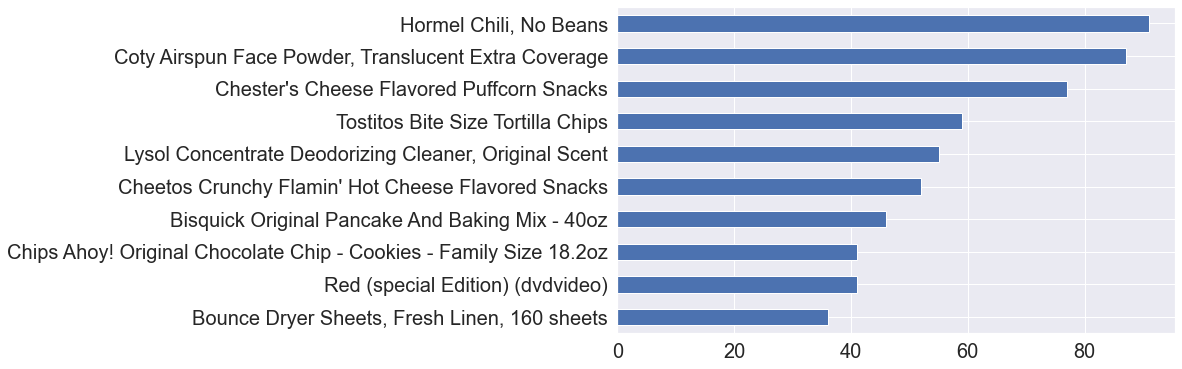

In [ ]:
# 10 popular products (from 304 unique products, 3681 rows)
df['product'].value_counts()[0:10].plot(kind ='barh', figsize=[10,6], fontsize=20).invert_yaxis()

In [ ]:
df[df['product'] == 'Hormel Chili, No Beans']

,brand,categories,product,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_rating,reviews_text,reviews_title,reviews_username
6267,Hormel,"Food,Packaged Foods,Canned Foods,Canned Meals,Canned Chili,Food & Beverage,Meal Solutions, Grains & Pasta,Canned, Jarred & Packaged Foods,Canned & Packaged Beans,Holiday Shop,Christmas,Soups, Chili, Stocks & Broth,Chili,Canned Goods & Soups,Beans,Featured Brands,Grocery,Hormel,Beans & Peas,Groce...","Hormel Chili, No Beans",2017-02-13T00:00:00.000Z,True,False,AVpf385g1cnluZ0-s0_t,1,Bland and want buy again,Bland,redhead
6277,Hormel,"Food,Packaged Foods,Canned Foods,Canned Meals,Canned Chili,Food & Beverage,Meal Solutions, Grains & Pasta,Canned, Jarred & Packaged Foods,Canned & Packaged Beans,Holiday Shop,Christmas,Soups, Chili, Stocks & Broth,Chili,Canned Goods & Soups,Beans,Featured Brands,Grocery,Hormel,Beans & Peas,Groce...","Hormel Chili, No Beans",2017-03-06T00:00:00.000Z,True,False,AVpf385g1cnluZ0-s0_t,2,Runny,Had better,tleigh
6278,Hormel,"Food,Packaged Foods,Canned Foods,Canned Meals,Canned Chili,Food & Beverage,Meal Solutions, Grains & Pasta,Canned, Jarred & Packaged Foods,Canned & Packaged Beans,Holiday Shop,Christmas,Soups, Chili, Stocks & Broth,Chili,Canned Goods & Soups,Beans,Featured Brands,Grocery,Hormel,Beans & Peas,Groce...","Hormel Chili, No Beans",2017-02-10T00:00:00.000Z,True,False,AVpf385g1cnluZ0-s0_t,2,"This tastes like canned hot dog sauce more than chili. It might be okay on a hot dog with onions, but not for a bowl of chili. I won't buy it again.",Not the best,wvshopaholic
6280,Hormel,"Food,Packaged Foods,Canned Foods,Canned Meals,Canned Chili,Food & Beverage,Meal Solutions, Grains & Pasta,Canned, Jarred & Packaged Foods,Canned & Packaged Beans,Holiday Shop,Christmas,Soups, Chili, Stocks & Broth,Chili,Canned Goods & Soups,Beans,Featured Brands,Grocery,Hormel,Beans & Peas,Groce...","Hormel Chili, No Beans",2016-07-26T00:00:00.000Z,True,False,AVpf385g1cnluZ0-s0_t,2,"I LIKE HORMEL CHILI, BUT, WALMART HAS PROBLEMS WITH CANNED GOODS. BUY IT AT THE STORE. BIG TIME DENTS.","GOOD CHILI, BAD HANDLING",angelbaby
6281,Hormel,"Food,Packaged Foods,Canned Foods,Canned Meals,Canned Chili,Food & Beverage,Meal Solutions, Grains & Pasta,Canned, Jarred & Packaged Foods,Canned & Packaged Beans,Holiday Shop,Christmas,Soups, Chili, Stocks & Broth,Chili,Canned Goods & Soups,Beans,Featured Brands,Grocery,Hormel,Beans & Peas,Groce...","Hormel Chili, No Beans",2017-03-13T00:00:00.000Z,True,False,AVpf385g1cnluZ0-s0_t,3,"Good product, way too expensive.",Hormel Chili no beans,manshopper
...,...,...,...,...,...,...,...,...,...,...,...
6449,Hormel,"Food,Packaged Foods,Canned Foods,Canned Meals,Canned Chili,Food & Beverage,Meal Solutions, Grains & Pasta,Canned, Jarred & Packaged Foods,Canned & Packaged Beans,Holiday Shop,Christmas,Soups, Chili, Stocks & Broth,Chili,Canned Goods & Soups,Beans,Featured Brands,Grocery,Hormel,Beans & Peas,Groce...","Hormel Chili, No Beans",2016-09-23T00:00:00.000Z,True,True,AVpf385g1cnluZ0-s0_t,5,"Hormel Chili with no beans has been my families favorite for years! I remember my mother using it to make me chili dogs and now I use it for my kids and I'm happy to say they love it! I have tried other brands but we can always taste the difference, even the kids will notice the lack of meat and...",Family Favorite!,maria6143
6450,Hormel,"Food,Packaged Foods,Canned Foods,Canned Meals,Canned Chili,Food & Beverage,Meal Solutions, Grains & Pasta,Canned, Jarred & Packaged Foods,Canned & Packaged Beans,Holiday Shop,Christmas,Soups, Chili, Stocks & Broth,Chili,Canned Goods & Soups,Beans,Featured Brands,Grocery,Hormel,Beans & Peas,Groce...","Hormel Chili, No Beans",2016-10-15T00:00:00.000Z,True,True,AVpf385g1cnluZ0-s0_t,5,Not anything this is so good i've bought it for years love it.,Awesome no bean chili,esther
6451,Hormel,"Food,Packaged Foods,Canned Foods,Canned Meals,Canned Chili,Food & Beverage,Meal Solutions, Grains & Pasta,Canned, Jarred & Packaged Foo

In [ ]:
# new df with list of users and favourite products only
df_user_product = df[['reviews_username', 'product', 'reviews_rating']]
df_user_product = df_user_product[df_user_product['reviews_rating'] == 5]
df_user_product = df_user_product.drop(columns=['reviews_rating'], axis=1)

In [ ]:
df_genuine.shape

(1434, 24)

In [ ]:
df_genuine[df_genuine['Review'].str.contains('disappoint')]
df_genuine.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,Review,Review_WC,Review_CC,Review_AWL,product_cat,year,day,month,hour,minute,second
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive,good good flavor review collect part promotion,7,46,5.714286,Food & Beverage,2017,9,7,0,0,0


In [ ]:
df_genuine['name'].value_counts()

Hormel Chili, No Beans                                                      91
Coty Airspun Face Powder, Translucent Extra Coverage                        87
Chester's Cheese Flavored Puffcorn Snacks                                   77
Tostitos Bite Size Tortilla Chips                                           59
Lysol Concentrate Deodorizing Cleaner, Original Scent                       55
                                                                            ..
Suave Professionals Hair Conditioner, Sleek                                  1
Bi-O-kleen Spray & Wipe All Purpose Cleaner                                  1
Head & Shoulders Classic Clean Conditioner                                   1
Physicians Formula Powder Palette Mineral Glow Pearls, Translucent Pearl     1
Mill Creek Aloe Vera & Paba Lotion                                           1
Name: name, Length: 144, dtype: int64

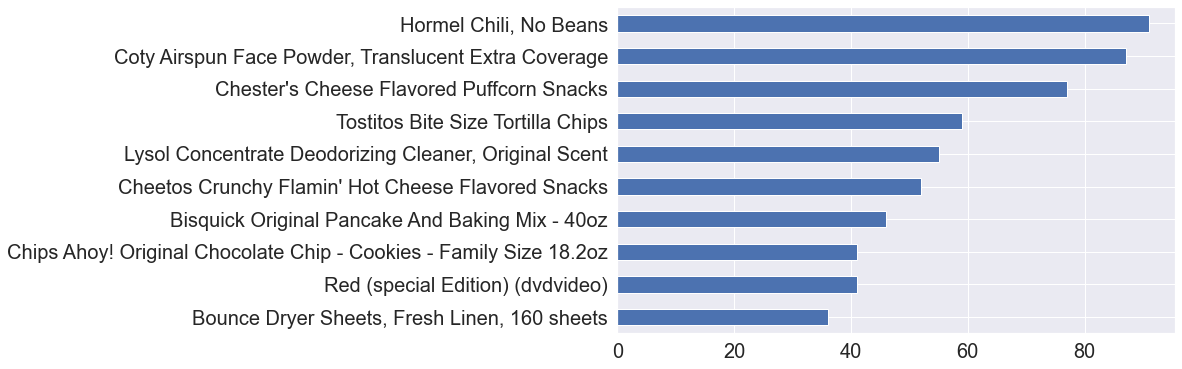

In [ ]:
# 10 popular products (from 304 unique products, 3681 rows)
df_genuine['name'].value_counts()[0:10].plot(kind = 'barh', figsize=[10,6], fontsize=20).invert_yaxis()

In [ ]:
df_genuine[df_genuine['name'] == 'Hormel Chili, No Beans']
df_genuine.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,Review,Review_WC,Review_CC,Review_AWL,product_cat,year,day,month,hour,minute,second
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive,good good flavor review collect part promotion,7,46,5.714286,Food & Beverage,2017,9,7,0,0,0


### **Create Recommendation dataset**

In [ ]:
# new df with list of users and favourite products only
df_user_product = df_genuine[['reviews_username', 'name', 'reviews_rating']]
df_user_product = df_user_product[df_user_product['reviews_rating'] == 5]
df_user_product = df_user_product.drop(columns=['reviews_rating'], axis=1)
df_user_product.shape

(1085, 2)

In [ ]:
df_user_product['reviews_username'].value_counts()

donna            4
mimi             3
none             3
mary             3
patty            3
                ..
scoobiedoo123    1
tony             1
lydia            1
kingsbridge      1
savvy1           1
Name: reviews_username, Length: 1042, dtype: int64

In [ ]:
df = pd.read_csv("Updated_Sample30.csv")

In [ ]:
df.head(3)

,Unnamed: 0,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,Review
0,0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive,awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy
1,1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive,good good flavor review collect part promotion
2,2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,Positive,good good flavor


In [ ]:
df = df[["reviews_username","reviews_rating","name"]] 

In [ ]:
# Dropping all missing values
df = df.dropna()

In [ ]:
# Renaming the columns
df.rename(columns={'reviews_username' : 'userID','reviews_rating':'rating','name':'prod_name'}, inplace=True)

In [ ]:
print("Total data ")
print("-"*50)
print("\n Total no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.userID)))
print("Total No of products  :", len(np.unique(df.prod_name)))

Total data 
--------------------------------------------------

 Total no of ratings : 29897
Total No of Users   : 24877
Total No of products  : 269


In [ ]:
df.isnull().any().any()

False

In [ ]:
df['prod_name'] = df['prod_name'].apply(lambda x: x.replace(',',''))

In [ ]:
df.columns

Index(['userID', 'rating', 'prod_name'], dtype='object')

In [ ]:
counts1=df['userID'].value_counts() 
counts=df['prod_name'].value_counts()

In [ ]:
len(counts1[counts1>=2].index)

3608

In [ ]:
len(counts[counts>=2].index)

221

In [ ]:
df1=df[df['userID'].isin(counts1[counts1 >=2].index)]
df1.shape

(8628, 3)

In [ ]:
df1=df1[df1['userID'].isin(counts1[counts1 >=1].index)]
df1.shape

(8628, 3)

In [ ]:
df1.head()

,userID,rating,prod_name
0,joshua,5,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,dorothy w,5,Lundberg Organic Cinnamon Toast Rice Cakes
2,dorothy w,5,Lundberg Organic Cinnamon Toast Rice Cakes
3,rebecca,1,K-Y Love Sensuality Pleasure Gel
5,samantha,1,K-Y Love Sensuality Pleasure Gel


In [ ]:

len(set(df1['userID']))
df1

,userID,rating,prod_name
0,joshua,5,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,dorothy w,5,Lundberg Organic Cinnamon Toast Rice Cakes
2,dorothy w,5,Lundberg Organic Cinnamon Toast Rice Cakes
3,rebecca,1,K-Y Love Sensuality Pleasure Gel
5,samantha,1,K-Y Love Sensuality Pleasure Gel
...,...,...,...
29781,emily95,5,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz
29795,brookieboo1994,5,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz
29875,talmariejohn,5,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz
29898,filo123,5,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz


In [ ]:
ratings_sum = pd.DataFrame(df1.groupby(['userID'])['rating'].sum()).rename(columns = {'rating': 'ratings_sum'})
user_id_df = ratings_sum.sort_values('ratings_sum', ascending = False)

In [ ]:
user_id_df

,ratings_sum
userID,
mike,181
byamazon customer,162
chris,146
lisa,73
tony,69
...,...
originatotalcarelover,2
crysv,2
pamela m,2


In [ ]:
top_popular=user_id_df.merge(df1,left_index = True, right_on = 'userID').drop_duplicates(
    ['userID', 'prod_name'])[['userID', 'prod_name','ratings_sum']]
top_popular

,userID,prod_name,ratings_sum
1295,mike,Meguiar's Deep Crystal Car Wash 64-Oz.,181
1339,mike,Banana Boat Sunless Summer Color Self Tanning Lotion Light To Medium,181
1869,mike,Mike Dave Need Wedding Dates (dvd + Digital),181
2632,mike,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),181
5406,mike,100:Complete First Season (blu-Ray),181
...,...,...,...
22399,originatotalcarelover,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,2
22367,crysv,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,2
21207,pamela m,Nexxus Exxtra Gel Style Creation Sculptor,2
26421,pat65,Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55 4oz,2


In [ ]:
top_popular_user= top_popular[top_popular['userID']=='mike']
top_popular_user

,userID,prod_name,ratings_sum
1295,mike,Meguiar's Deep Crystal Car Wash 64-Oz.,181
1339,mike,Banana Boat Sunless Summer Color Self Tanning Lotion Light To Medium,181
1869,mike,Mike Dave Need Wedding Dates (dvd + Digital),181
2632,mike,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),181
5406,mike,100:Complete First Season (blu-Ray),181
13828,mike,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,181
15448,mike,Chester's Cheese Flavored Puffcorn Snacks,181
18041,mike,Tostitos Simply Blue Corn Tortilla Chips,181
18175,mike,There's Something About Mary (dvd),181
18281,mike,Bilbao Nightstand Gray Oak - South Shore,181


In [ ]:
top_popular.to_pickle("recommendation_model.pkl")

In [ ]:
unpickled_df = pd.read_pickle("recommendation_model.pkl")
model_result_df= unpickled_df[unpickled_df['userID']=='milo']
product_name= list(model_result_df['prod_name'])
product_name[0:5]

['Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'Clorox Disinfecting Bathroom Cleaner']

In [ ]:
user_name= (list(set(unpickled_df['userID'])))
print(user_name)

['danigirl2525', 'lb17', 'zburt5', 'jask', 'missd32', 'prgirl', 'katie80', 'feeee', 'luisa', 'xmom', 'buttercup', 'robflutie', 'racerfan3', 'barbara', 'kaylanicole136', 'tetter74', 'pakmk', 'moms', 'hipitarian', 'takisha56ett', 'girlie', 'vick88', 'rana', 'catl', 'kermit97jac', 'aluns', 'lina', 'phantom', 'coopsmom', 'robb', 'gatorbobert', 'britt', 'jules26', 'morgbullard', 'deda', 'goofy4prez', 'pat13', 'mich', 'bestbuyfan', 'lorrei', 'clanoux', 'dkhall85', 'thewix', 'kmin', 'char', 'shannon27', 'alexa86', 'mistyboo', 'wildchild23', 'moviebuff', 'kristen128', 'esther', 'marinebiochic07', 'dale', 'backstagepass475', 'lisay', 'lori', 'pamm', 'mellin1', 'neverdock', 'sanmom1', 'manda0704', 'jessieleigh', 'wiseman378', 'heatherreneexo', 'cleaning123', 'theresa79', 'todd', 'lorandal', 'sallym', 'brenda', 'arcticfox', 'del737', 'shirl0521', 'staci29', 'asohn', 'tausha', 'lassy', 'ruaamy', 'jackie124r', 'hrdwrkngmom', 'walker', 'drea', 'dianne', 'wizard', 'love', 'bluefox', 'jerridiane', 'hu

In [ ]:
with open("file.txt", "w") as f:
    for p in user_name:
        f.write("%r"%p +",")


In [ ]:
ratings_sum = pd.DataFrame(df1.groupby(['userID'])['rating'].sum()).rename(columns = {'rating': 'ratings_sum'})
top20 = ratings_sum.sort_values('ratings_sum', ascending = False).head(20)
top20

,ratings_sum
userID,
mike,181
byamazon customer,162
chris,146
lisa,73
tony,69
rick,67
sandy,67
john,66
jojo,62


In [ ]:
top20_popular=top20.merge(df1,left_index = True, right_on = 'userID').drop_duplicates(
    ['userID', 'prod_name'])[['userID', 'prod_name','ratings_sum']]

In [ ]:
print ('Top 20 Popular Products by sum user ratings\n')
top20_popular

Top 20 Popular Products by sum user ratings



,userID,prod_name,ratings_sum
1295,mike,Meguiar's Deep Crystal Car Wash 64-Oz.,181
1339,mike,Banana Boat Sunless Summer Color Self Tanning Lotion Light To Medium,181
1869,mike,Mike Dave Need Wedding Dates (dvd + Digital),181
2632,mike,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),181
5406,mike,100:Complete First Season (blu-Ray),181
...,...,...,...
15527,laura,Chester's Cheese Flavored Puffcorn Snacks,44
18387,laura,Lynk Professional174 Pull Out Cutting Board Bakeware Sliding Cabinet Organizer,44
18436,laura,Batherapy Natural Mineral Bath Sport Liquid 16 oz,44
21417,laura,Nexxus Exxtra Gel Style Creation Sculptor,44


In [ ]:
df1["prod_name"].value_counts()

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                               2322
Clorox Disinfecting Bathroom Cleaner                                                    1169
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz           798
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                          603
Nexxus Exxtra Gel Style Creation Sculptor                                                493
                                                                                        ... 
Lynk Professional174 Pull Out Cutting Board Bakeware Sliding Cabinet Organizer             1
Scooby Doo And The Loch Ness Monster (blu-Ray)                                             1
Smead174 Recycled Letter Size Manila File Backs W/prong Fasteners 2 Capacity 100/box       1
Honeywell Heatbud Ceramic Heater Black                                                     1
Kendall Comforter And Sheet Set (twin) Aqua - 7pc                     